### EDA on Weather Text Data

#### Importing Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import cufflinks as cf

from plotly.offline import iplot

import textblob

In [4]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

#### Data Import & Formatting the Dataset for Sentiment Analysis

In [5]:
df = pd.read_csv('weather-agg-DFE.csv')
df.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


In [6]:
df['text'] = df['tweet_text']
df.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text,text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   _unit_id                                                                        1000 non-null   int64  
 1   _canary                                                                         0 non-null      float64
 2   _unit_state                                                                     1000 non-null   object 
 3   _trusted_judgments                                                              1000 non-null   int64  
 4   _last_judgment_at                                                               1000 non-null   object 
 5   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 6   what_emotion_does

In [8]:
df=df.drop(columns=['_canary', 'gold_answer', 'tweet_text','_unit_id','_unit_state','_trusted_judgments','_last_judgment_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [9]:
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   string 
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 31.4+ KB


In [10]:
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                      2
Name: count, dtype: int64

In [11]:
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != 'Tweet not related to weather condition']
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != "I can't tell"]
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Positive                                        231
Name: count, dtype: int64

In [12]:
df = df.replace("Negative", -1)
df = df.replace("Neutral / author is just sharing information", 0)
df = df.replace("Positive", 1)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather': "Label"}, inplace=True)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather:confidence':"Label_Confidence"}, inplace=True)

#### Preprocessing Text

In [16]:
# Expanding Contractions
contractions = {"ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [17]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [19]:
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))
' '.join(df['text'].tolist())

'Grilling kabobs on the grill last night was amazing! I am so glad this weather is finally  here. The slowest day ever !! And the weather makes it even worse ! Fire Weather Watch issued May 17 at 4:21PM CDT expiring May 19 at 9:00PM CDT by NWS Lubbock... {link} Im going to lunch early today.   The weather is nice outside so Im going to enjoy #metime somewhere pleasant :) Weekend Weather Causes Delays In I-270 Bridge Work  {link} Passing out now.  working tonight. Storms today would be nice. Would be great sleeping weather. Mmmm US GAS: Warm-Weather Forecasts Lift Natural Gas Futures {link} @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3 I hate this weather. Good day for a movie marathon though... Xmen! :D TGif biatches! Here is to a sunny Friday regardless of rain and drama! #popularnameregardlessofparticipation @mention good crowd in Wrigley today, terrible weather. tell that redneck that just called in 2 check the Reds crowd on a Wed. day game 

#### Feature Engineering

In [20]:
df.head()
# we're going to add length of text, word count, and average word length columns.
# also, we will use textblob to add sentiment polarity columns

,Label,Label_Confidence,tweet_id,text
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,1,0.6897,82843785,Im going to lunch early today. The weather i...
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


In [21]:
from textblob import TextBlob

In [22]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [23]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [24]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [25]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)

    return word_len/len(words)

In [26]:
df['avg_word_length'] = df['text'].apply(lambda x: get_avg_word_len(x))

In [27]:
df.head()

,Label,Label_Confidence,tweet_id,text,polarity,text_length,word_count,avg_word_length
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...,0.312500,96,18,4.333333
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...,-0.500000,61,13,3.769231
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,0.000000,101,19,4.368421
3,1,0.6897,82843785,Im going to lunch early today. The weather i...,0.388889,111,20,4.500000
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,0.000000,58,9,5.444444


#### Exploring Variable Distributions

In [28]:
df['polarity'].iplot(kind = 'hist', xTitle = 'Polarity', yTitle = 'Count', title = 'Sentiment Polarity Distribution', bins = 50)
# most of the text entries have very neutral sentiment

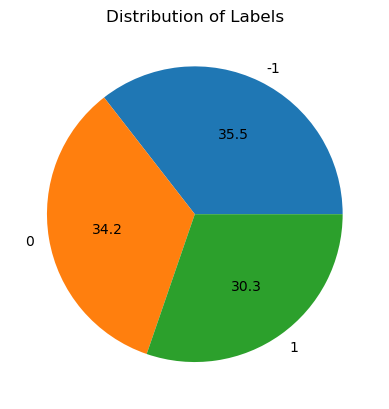

In [30]:
label_counts = df['Label'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
label_counts
labels_dist = plt.pie(label_counts['count'], labels=label_counts['Label'], autopct='%.1f')
plt.title("Distribution of Labels")
plt.show()

In [31]:
df['text_length'].iplot(kind = 'hist', xTitle = 'Text Length', yTitle = 'Count', title = "Distribution of Text Length", bins = 50)

In [32]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Count', yTitle = 'Count', title = "Distribution of Word Count")

In [33]:
df['avg_word_length'].iplot(kind = 'hist', xTitle = 'Average Word Length', yTitle = 'Count', title = "Distribution of Average Word Length", bins = 50)

#### Distribution of Unigram, Bigram, and Trigram

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

##### Unigrams

In [36]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams

In [37]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [38]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams

In [39]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [40]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')

##### Removing Stop Words for More Useful Distributions

##### Unigrams without Stop Words

In [41]:
def get_top_n_words(x, n):
    vec = CountVectorizer(stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [42]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams without Stop Words

In [43]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [44]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams without Stop Words

In [45]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [46]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')